In [212]:

import pandas as pd
import re
import functions
import pymysql
import sqlalchemy as alch
from dotenv import load_dotenv
import os
import warnings
warnings.filterwarnings("ignore")
import pycountry_convert as pc
import seaborn as sns

import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [213]:
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import metrics

In [214]:
wrl= pd.read_csv("wrl_renew.csv")
main= pd.read_csv("main.csv")
growth= pd.read_csv("growth.csv")

In [215]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (20.,10.)})
sns.set_style("whitegrid") 

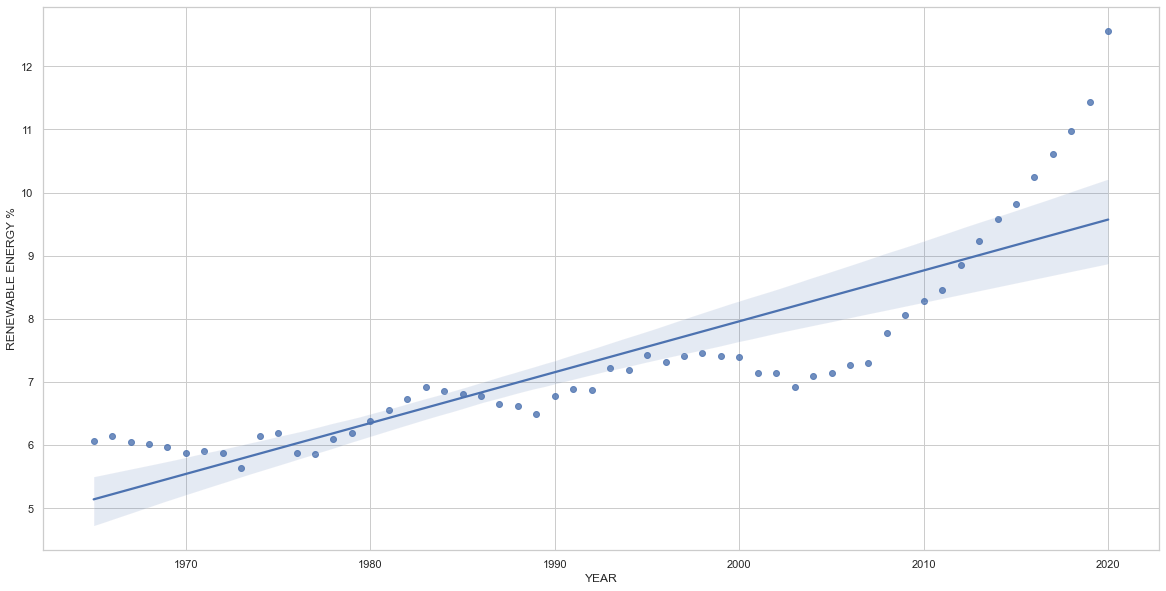

In [216]:
sns.regplot(x="YEAR", y="RENEWABLE ENERGY %", data=wrl);

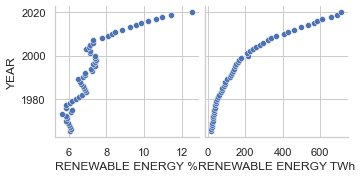

In [217]:
sns.pairplot(wrl,y_vars='YEAR',x_vars=('RENEWABLE ENERGY %','RENEWABLE ENERGY TWh'));

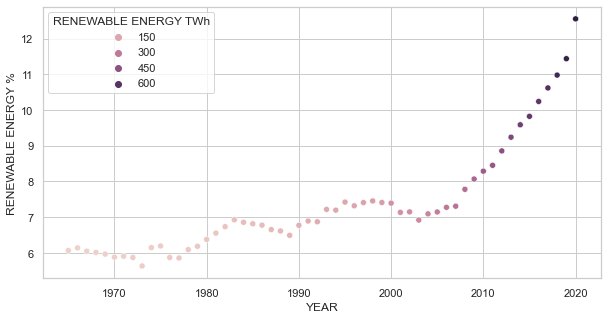

In [218]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (10.,5.)})
sns.set_style("whitegrid") 
sns.scatterplot(data=wrl,x='YEAR',y_bins=10,y='RENEWABLE ENERGY %',hue='RENEWABLE ENERGY TWh');

In [219]:
wrl.columns

Index(['ENTITY', 'ISO', 'YEAR', 'RENEWABLE ENERGY %', 'RENEWABLE ENERGY TWh'], dtype='object')

In [220]:
wrl.rolling(window=12)

Rolling [window=12,center=False,axis=0,method=single]

In [225]:
wrl_test=wrl[['YEAR','RENEWABLE ENERGY %']]

In [222]:
wrl_test.reset_index(drop=True, inplace=True)

In [226]:
models = {
    "lr": LinearRegression(),
   
    
    "knn": KNeighborsRegressor(),
    "grad": GradientBoostingRegressor(),
    "svr": SVR(),
    
}

In [227]:
y = wrl_test["RENEWABLE ENERGY %"]

X=wrl_test.drop(['RENEWABLE ENERGY %'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [228]:
for name, model in models.items():
        model.fit(X_train, y_train)

In [229]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"------{name}------")
    print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2 - ', metrics.r2_score(y_test, y_pred))

------lr------
RMSE -  0.5125242142215067
R2 -  0.7752471412825293
------knn------
RMSE -  0.18813117451270378
R2 -  0.9697170638325904
------grad------
RMSE -  0.1761686683895023
R2 -  0.973445765221491
------svr------
RMSE -  0.24929109035874067
R2 -  0.9468271471669865


In [230]:
lr=LinearRegression()

In [231]:
lr.fit(X_train, y_train)

LinearRegression()

In [232]:
y_pred = lr.predict(X_test)

In [233]:
lr.predict(X_test)
print(f"------lr------")
print('MAE - ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE - ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 - ', metrics.r2_score(y_test, y_pred))

------lr------
MAE -  0.4330522448312909
MSE -  0.26268107016337294
RMSE -  0.5125242142215067
R2 -  0.7752471412825293


In [234]:
lr.fit(X, y)

LinearRegression()

In [235]:
list_=[x for x in range(2021,2080)] 
X_f = pd.DataFrame(list_)
X_f

,0
0,2021
1,2022
2,2023
3,2024
4,2025
5,2026
6,2027
7,2028
8,2029
9,2030


In [236]:
X_f.columns=['YEAR']

In [237]:
y_f = lr.predict(X_f)

In [238]:
X_f['pred']=y_f

In [239]:
y_pred

array([7.7836393 , 7.11131847, 9.29636117, 5.59859661, 6.77515806,
       6.01879713, 8.20383982, 8.11979972, 5.3464763 , 7.36343878,
       9.04424086, 8.96020075, 5.5145565 , 7.02727837, 6.43899764,
       5.93475702, 6.94323826])

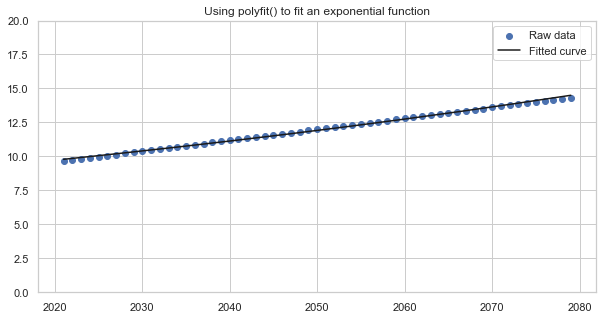

In [241]:
p = np.polyfit(X_f['YEAR'], np.log(X_f['pred']), 1)

a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(X_f['YEAR']), np.max(X_f['YEAR']), 10)
y_fitted = a * np.exp(b * x_fitted)
ax = plt.axes()
ax.scatter(X_f['YEAR'], X_f['pred'], label='Raw data')
ax.plot(x_fitted, y_fitted, 'k', label='Fitted curve')
ax.set_title('Using polyfit() to fit an exponential function')

ax.set_ylim(0, 20)

ax.legend()

In [242]:
p = np.polyfit(wrl['YEAR'], np.log(wrl['RENEWABLE ENERGY %']), 1)

In [243]:
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(wrl['YEAR']), np.max(wrl['YEAR']), 10)
y_fitted = a * np.exp(b * x_fitted)

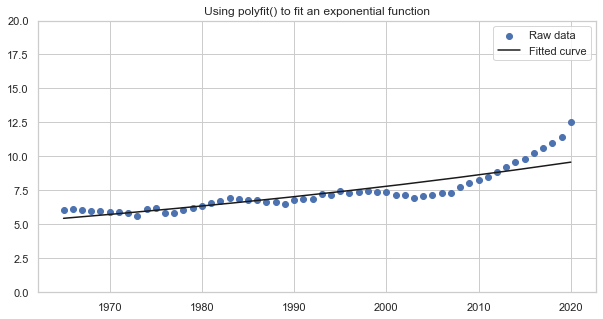

In [244]:
import matplotlib.pyplot as plt

ax = plt.axes()
ax.scatter(wrl['YEAR'], wrl['RENEWABLE ENERGY %'], label='Raw data')
ax.plot(x_fitted, y_fitted, 'k', label='Fitted curve')
ax.set_title('Using polyfit() to fit an exponential function')

ax.set_ylim(0, 20)

ax.legend()

In [199]:
wrl_2010=wrl.drop(wrl[(wrl['YEAR'] <2008)].index,axis=0)

In [245]:
wrl_2010=wrl_2010[['YEAR','RENEWABLE ENERGY %']]

In [246]:
p = np.polyfit(wrl_2010['YEAR'], np.log(wrl_2010['RENEWABLE ENERGY %']), 1, w=np.sqrt(wrl_2010['RENEWABLE ENERGY %']))

# Convert the polynomial back into an exponential
a = np.exp(p[1])
b = p[0]
x_fitted_weighted = np.linspace(np.min(wrl_2010['YEAR']), np.max(wrl_2010['YEAR']), 100)
y_fitted_weighted = a * np.exp(b * x_fitted_weighted)

# Plot


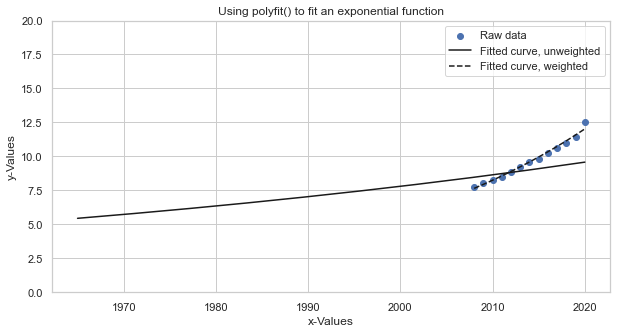

In [247]:
ax = plt.axes()
ax.scatter(wrl_2010['YEAR'], wrl_2010['RENEWABLE ENERGY %'], label='Raw data')
ax.plot(x_fitted, y_fitted, 'k', label='Fitted curve, unweighted')
ax.plot(x_fitted_weighted, y_fitted_weighted, 'k--', label='Fitted curve, weighted')
ax.set_title('Using polyfit() to fit an exponential function')
ax.set_ylabel('y-Values')
ax.set_ylim(0, 20)
ax.set_xlabel('x-Values')
ax.legend()

In [266]:
y = wrl_2010["RENEWABLE ENERGY %"]

X=wrl_2010.drop(['RENEWABLE ENERGY %'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

for name, model in models.items():
        model.fit(X_train, y_train)

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"------{name}------")
    print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2 - ', metrics.r2_score(y_test, y_pred))

lr=LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr.predict(X_test)
print(f"------lr------")
print('MAE - ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE - ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 - ', metrics.r2_score(y_test, y_pred))

lr.fit(X, y)

list_=[x for x in range(2021,2121)] 
X_f = pd.DataFrame(list_)
X_f

X_f.columns=['YEAR']

y_f = lr.predict(X_f)

X_f['RENEWABLE ENERGY %']=y_f

y_pred

------lr------
RMSE -  0.46800375970714936
R2 -  0.926604625091098
------knn------
RMSE -  1.190818201909931
R2 -  0.5248169531732044
------grad------
RMSE -  0.631245083567592
R2 -  0.8664739423874694
------svr------
RMSE -  0.9665481299547343
R2 -  0.6869476422194667
------lr------
MAE -  0.2873049999999868
MSE -  0.21902751910002718
RMSE -  0.46800375970714936
R2 -  0.926604625091098


array([11.64402,  7.55514, 10.6218 ,  9.59958])

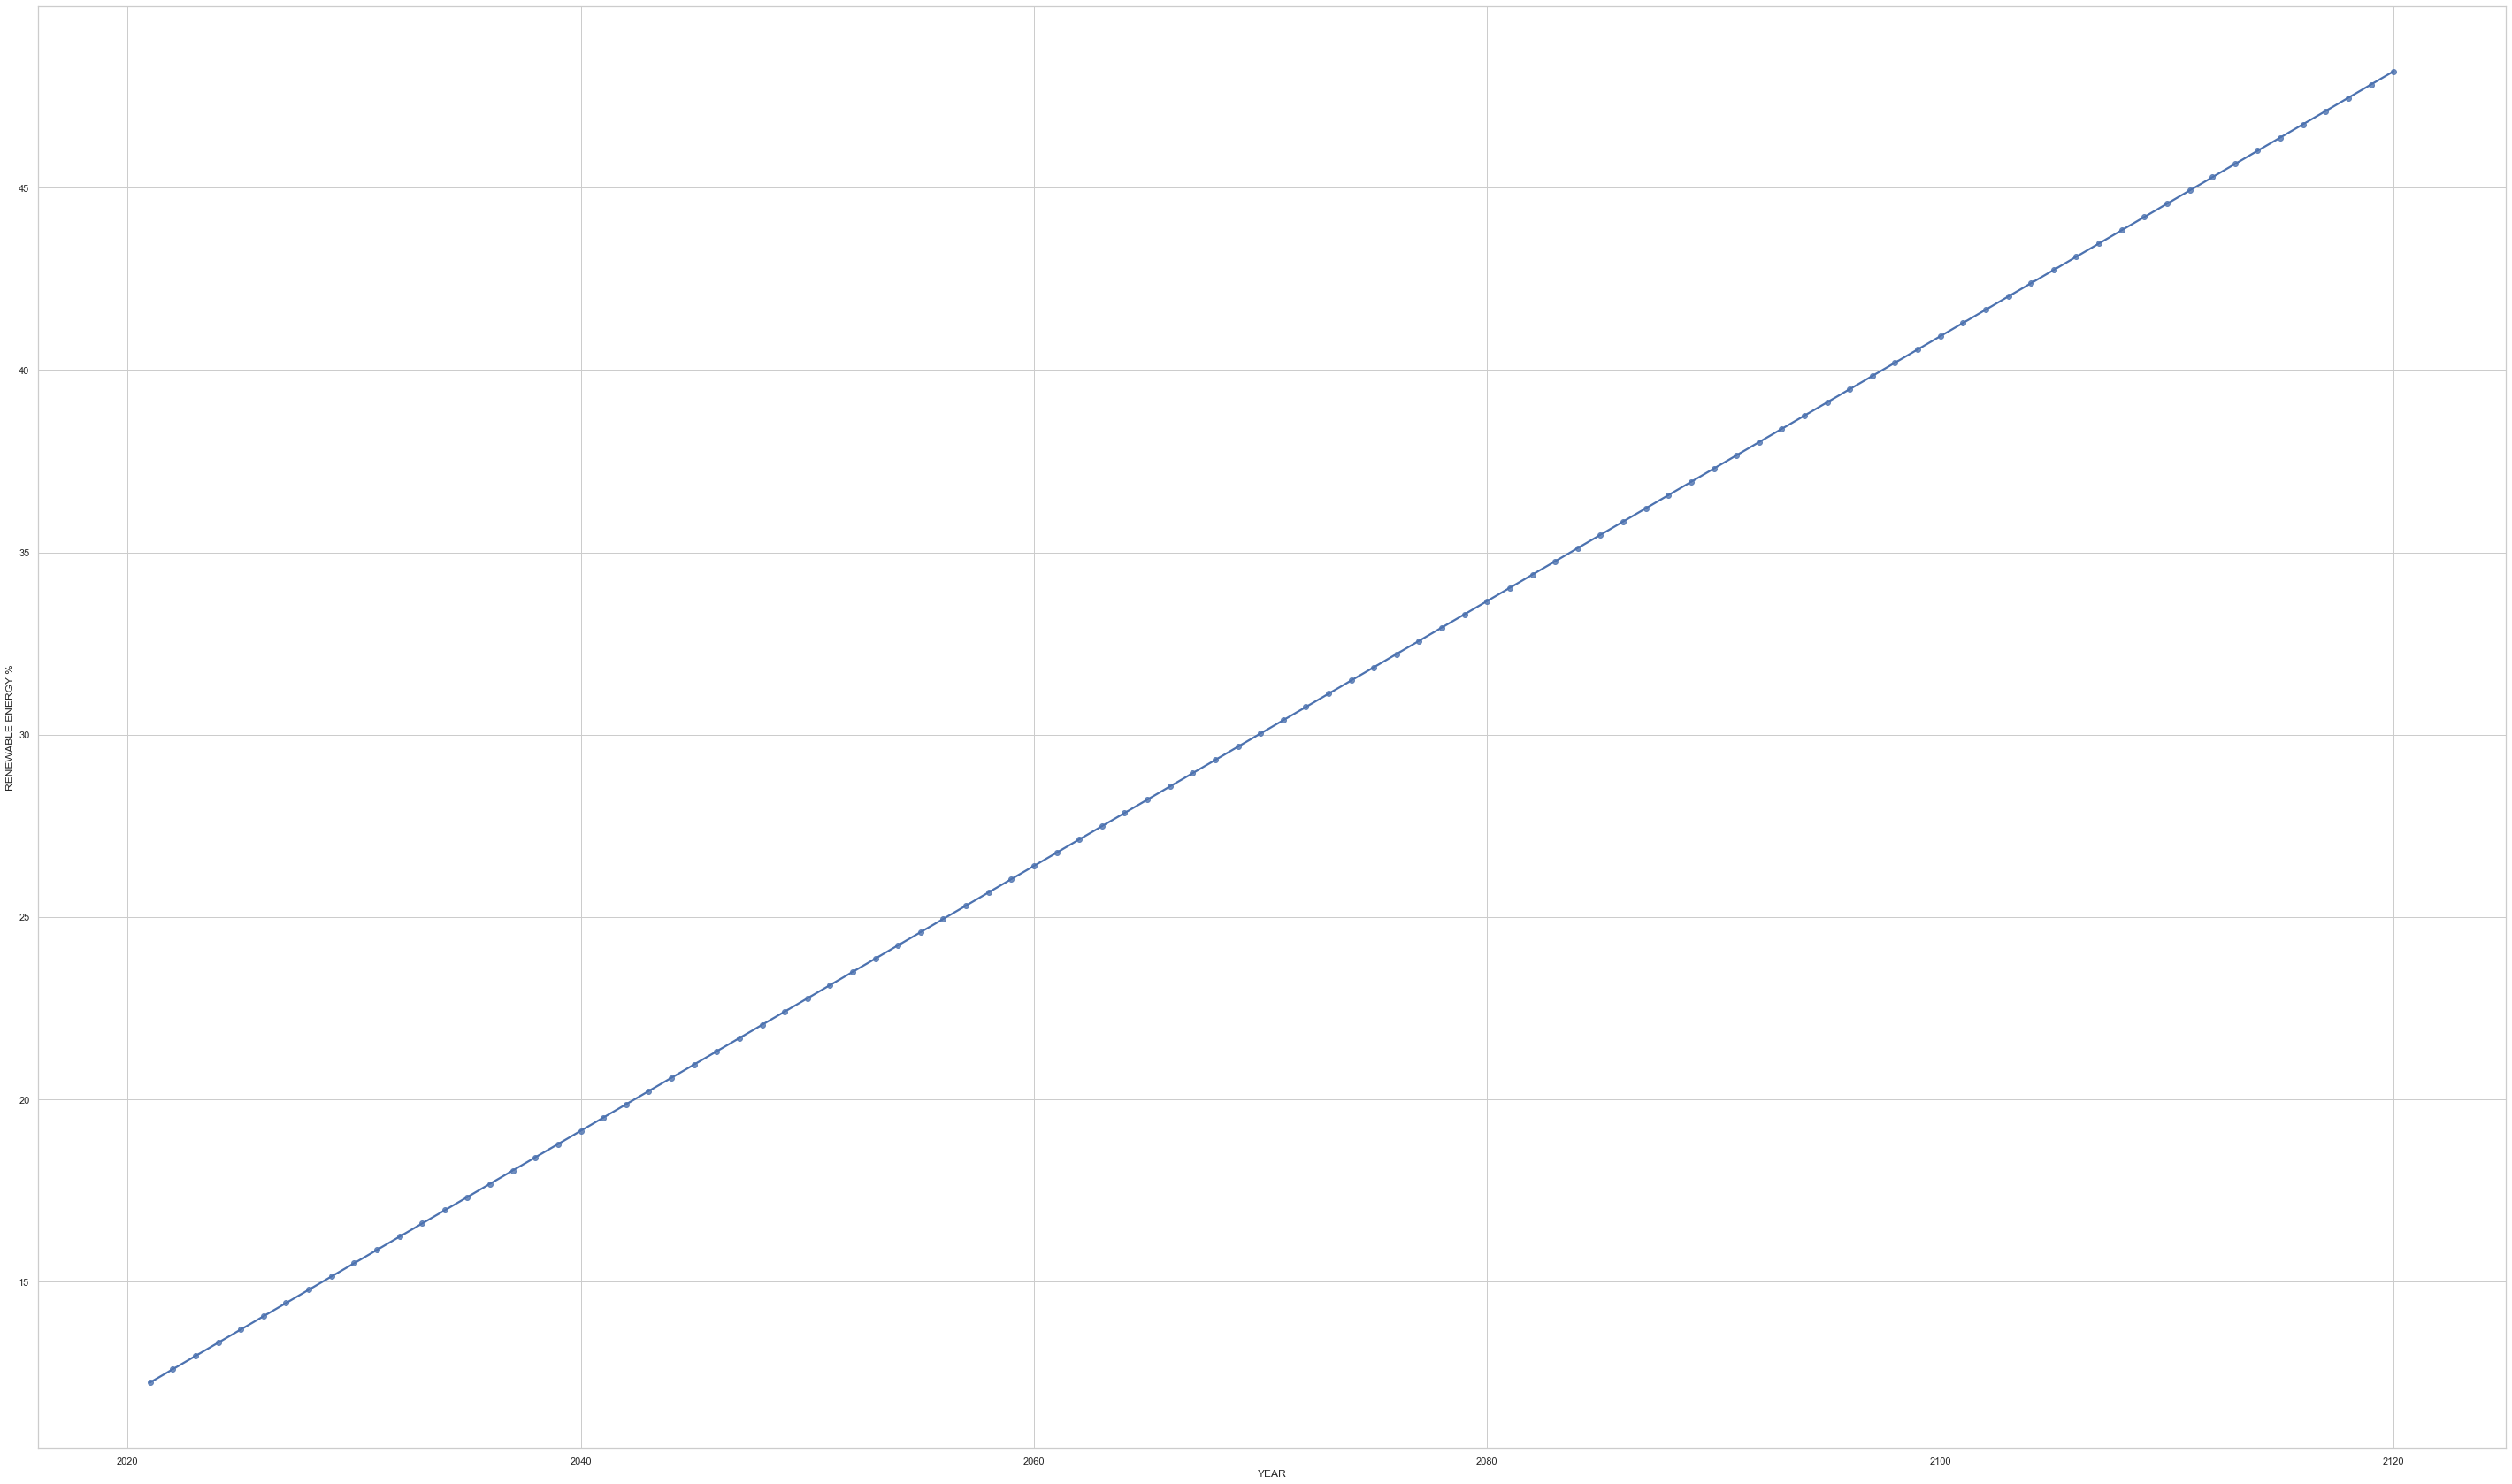

In [305]:
sns.regplot(x=X_f["YEAR"], y=X_f["RENEWABLE ENERGY %"]);

In [306]:
testy=pd.concat([wrl_test, X_f], axis=0)

<AxesSubplot:xlabel='YEAR', ylabel='RENEWABLE ENERGY %'>

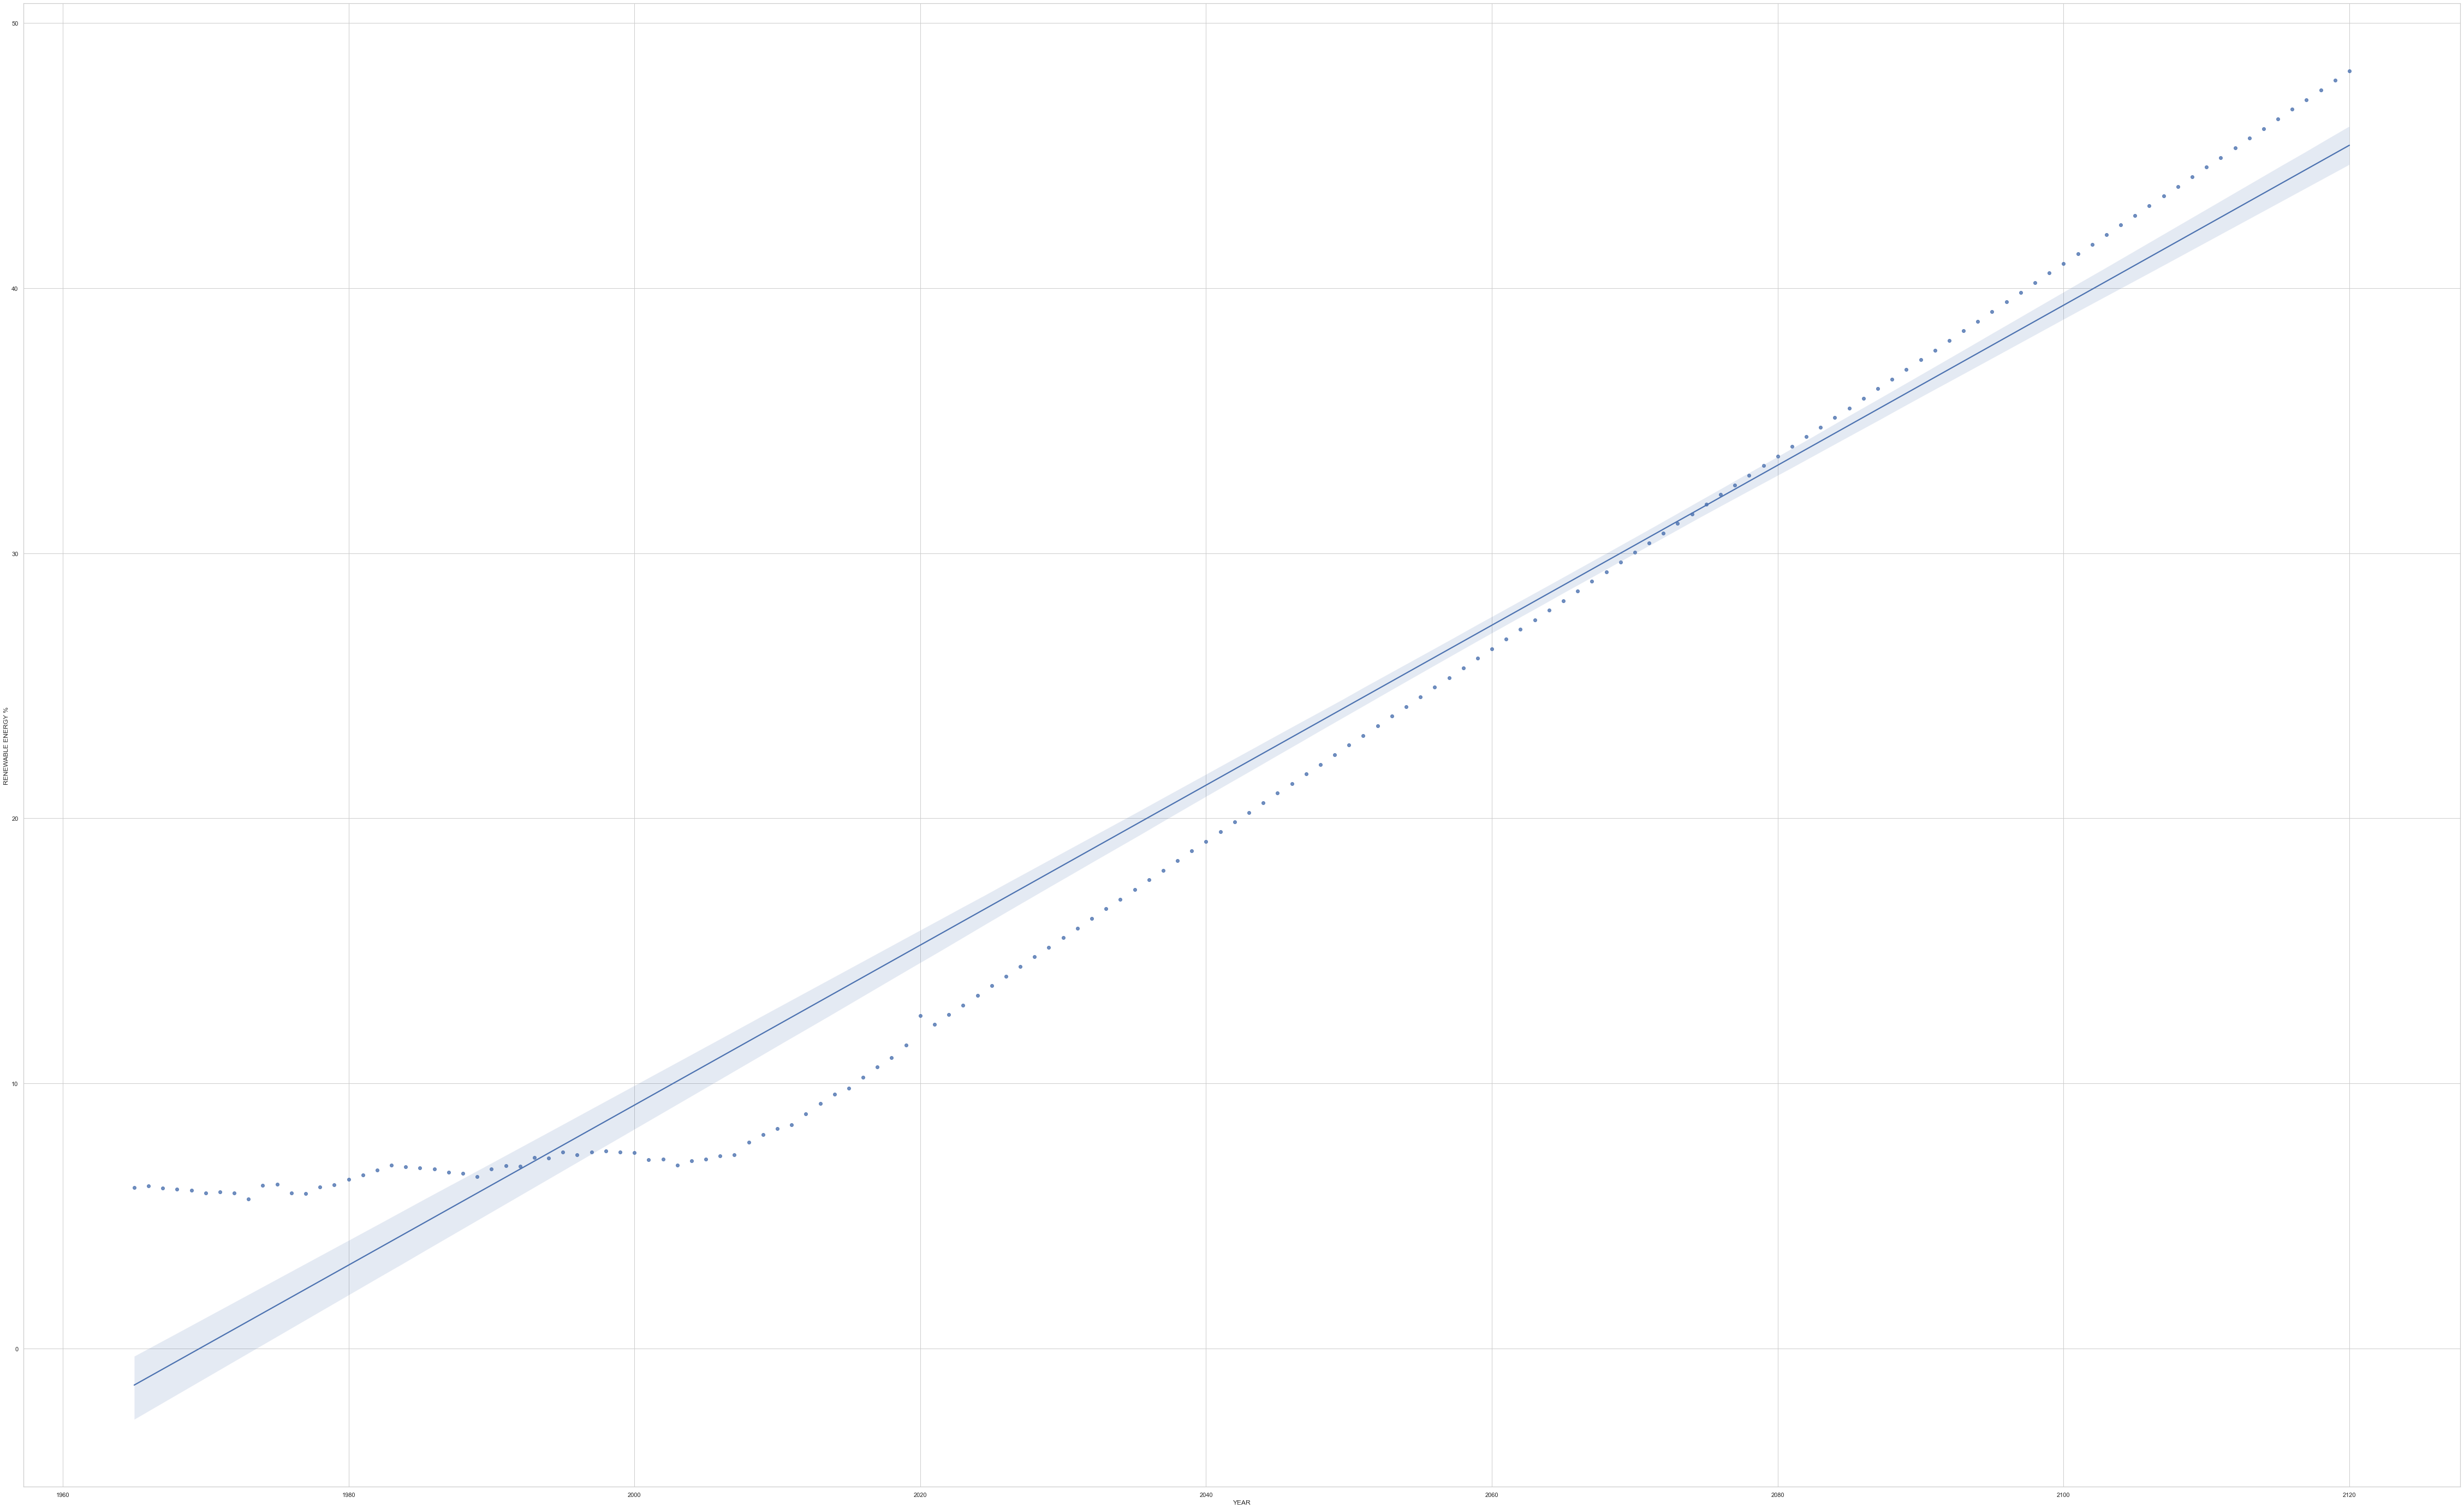

In [293]:
sns.regplot(data=testy, x='YEAR',y='RENEWABLE ENERGY %')

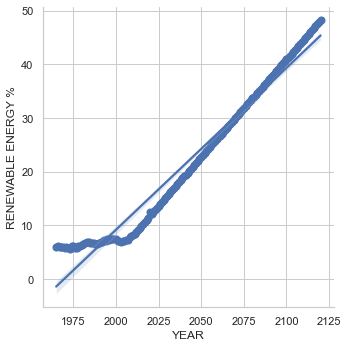

In [292]:
sns.lmplot(data=testy, x='YEAR',y='RENEWABLE ENERGY %', x_estimator=np.mean);

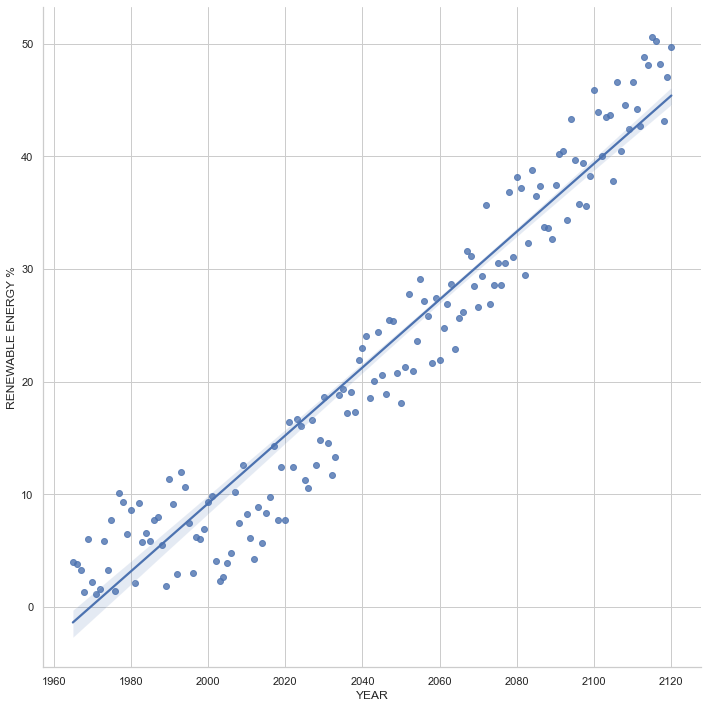

In [302]:
sns.lmplot(data=testy, x='YEAR',y='RENEWABLE ENERGY %', y_jitter=5,size=10);

In [304]:
testy.to_csv('pred.csv', index = False, encoding='utf-8')

In [314]:
X_f

,YEAR,RENEWABLE ENERGY %
0,2021,13.451223
1,2022,13.850849
2,2023,14.250476
3,2024,14.650102
4,2025,15.049729
...,...,...
95,2116,51.415729
96,2117,51.815355
97,2118,52.214981
98,2119,52.614608


In [33]:
#wrl_test['YEAR'] = pd.to_datetime(wrl['YEAR'], format='%Y')